In [24]:
from astropy.io import fits
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import tempfile
import imageio
from scipy import signal
from importlib import reload
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pylab as pl
# my own code
import sim.err_budget as eb

# NEW: use the .py file

In [25]:
reload(eb)

<module 'sim.err_budget' from '/home/eden/code/sparkles/sim/err_budget.py'>

## Vary Parameters

### Vary Modes

In [105]:
# Paremeter lists
DIMM_list = np.arange(.2, 2.0, 0.05)
r_o_list = eb.seeing_to_r_o(DIMM_list)
modal_control = [1536, 1207, 1013, 847, 681, 536, 411]
# Calc Strehl
strehl_modes_list = [[eb.calc_strehl(r_o = r_i, n_act = a, s_mag = 5, Hz=1800, rms_jitter = 5) for r_i in r_o_list] for a in modal_control]
strehl_modes_iter_list = [[eb.calc_strehl_iter(r_o = r_i, n_act = a, s_mag = 5, Hz=1800, rms_jitter = 5) for r_i in r_o_list] for a in modal_control]

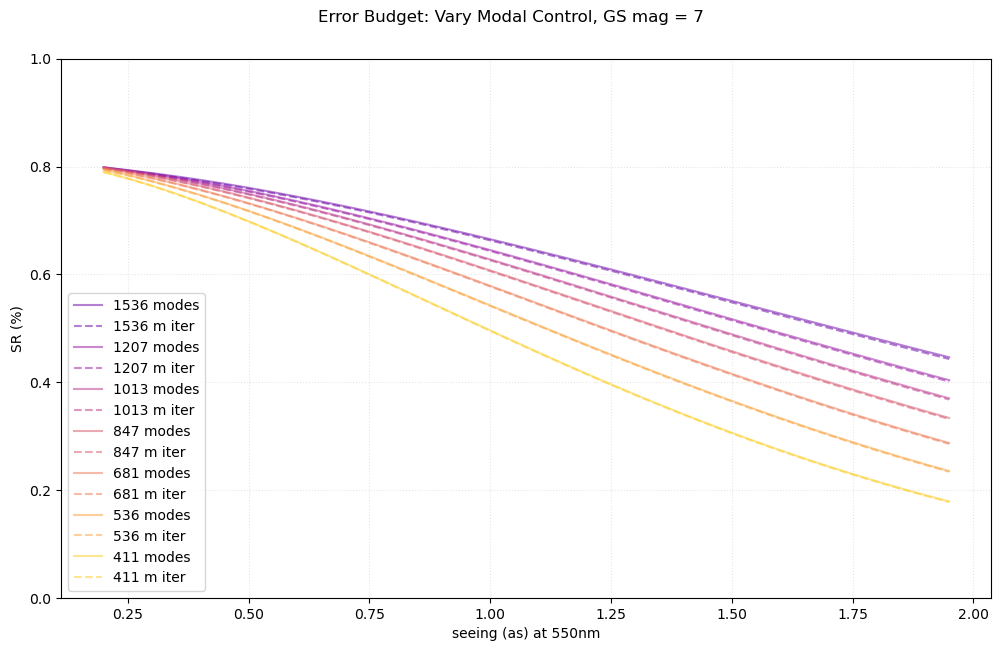

In [106]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12,7), facecolor='white', sharey=True)
fig.suptitle("Error Budget: Vary Modal Control, GS mag = 7", y = 0.95)
fig.subplots_adjust(wspace=0, hspace = 0)
axs.grid(color='grey', linestyle=':', alpha=0.2)

n = len(modal_control)

colors = pl.cm.plasma(np.linspace(0.2,.9, n))

for i in range(n):
    axs.plot(DIMM_list, strehl_modes_list[i], label = f"{modal_control[i]} modes", color=colors[i], alpha=0.5)
    axs.plot(DIMM_list, strehl_modes_iter_list[i], label = f"{modal_control[i]} m iter", color=colors[i], ls = 'dashed', alpha=0.5)
    axs.set_xlabel('seeing (as) at 550nm')

axs.set_ylabel('SR (%)')
axs.set_ylim(0,1)
axs.legend()

plt.show()

### vary mag

In [121]:
# params
DIMM_list = np.arange(.2, 2.0, 0.05)
r_o_list = eb.seeing_to_r_o(DIMM_list) # in meters
mags_list = np.arange(2, 9, 1)
# calc strehl
strehl_mags_list = [[eb.calc_strehl(r_o = r_i, s_mag = m, rms_jitter = 5) for r_i in r_o_list] for m in mags_list]
strehl_mags_list_iter = [[eb.calc_strehl_iter(r_o = r_i, s_mag = m, rms_jitter = 5) for r_i in r_o_list] for m in mags_list]

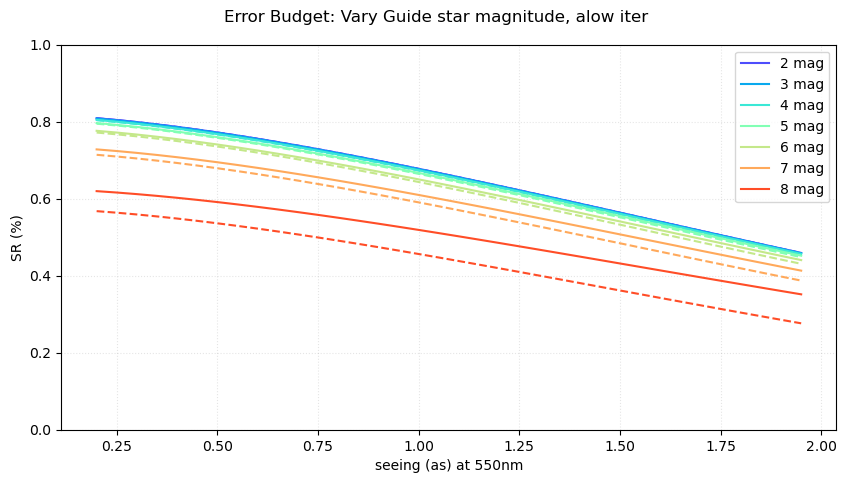

In [122]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5), facecolor='white', sharey=True)
fig.suptitle("Error Budget: Vary Guide star magnitude, alow iter", y = 0.95)
fig.subplots_adjust(wspace=0, hspace = 0)
axs.grid(color='grey', linestyle=':', alpha=0.2)

n = len(mags_list)
colors = pl.cm.rainbow(np.linspace(0.1,.9, n))

for i in range(n):
    axs.plot(DIMM_list, strehl_mags_list[i], label = f"{mags_list[i]} mag", color=colors[i])
    axs.plot(DIMM_list, strehl_mags_list_iter[i], color=colors[i], ls='dashed')
    axs.set_xlabel('seeing (as) at 550nm')

axs.set_ylabel('SR (%)')
#axs.set_xlim(0.1, 1.95)
axs.set_ylim(0,1)
axs.legend()

plt.show()

#### Both for comparison

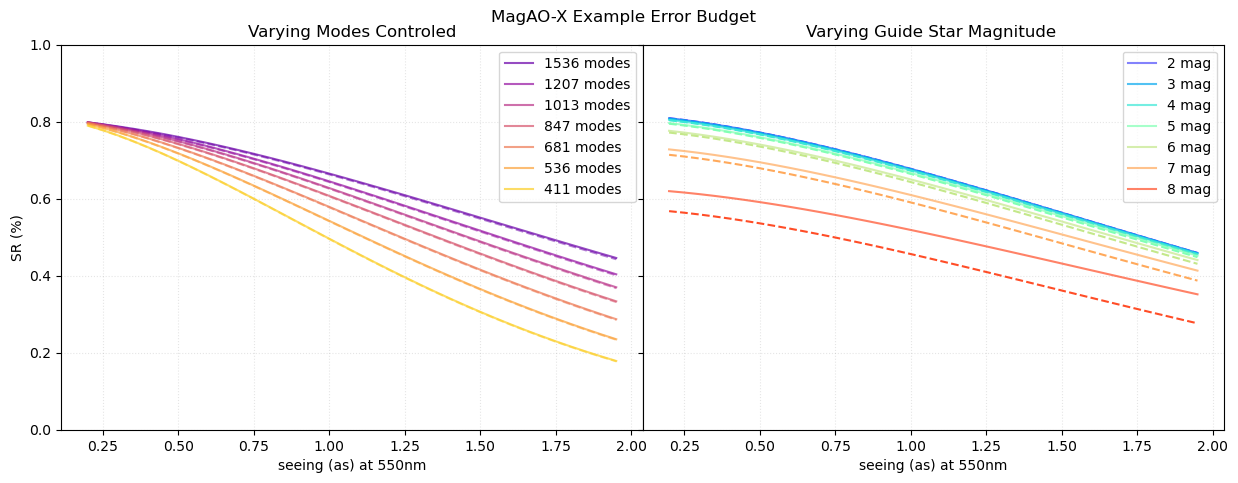

In [118]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5), facecolor='white', sharey=True)
fig.suptitle("MagAO-X Example Error Budget", y = 0.95)
fig.subplots_adjust(wspace=0, hspace = 0)

axs[0].grid(color='grey', linestyle=':', alpha=0.2)
axs[1].grid(color='grey', linestyle=':', alpha=0.2)

axs[0].set_ylabel('SR (%)')
colors = pl.cm.plasma(np.linspace(0.2,.9, len(modal_control)))
for i in range(len(modal_control)):
    axs[0].plot(DIMM_list, strehl_modes_list[i], label = f"{modal_control[i]} modes", color=colors[i], alpha=0.7)
    axs[0].plot(DIMM_list, strehl_modes_iter_list[i],  color=colors[i], ls = 'dashed', alpha=0.5)
    axs[0].set_title('Varying Modes Controled')
    axs[0].set_xlabel('seeing (as) at 550nm')
axs[0].legend()

colors = pl.cm.rainbow(np.linspace(0.1,.9, len(mags_list)))
for i in range(len(mags_list)):
    axs[1].plot(DIMM_list, strehl_mags_list[i], label = f"{mags_list[i]} mag", color=colors[i], alpha=0.7)
    axs[1].plot(DIMM_list, strehl_mags_list_iter[i], color=colors[i], ls='dashed')
    axs[1].set_xlabel('seeing (as) at 550nm')
    axs[1].set_title('Varying Guide Star Magnitude ')
axs[1].legend()
axs[0].set_ylim(0,1)

plt.show()

### vary jitter RMS

In [66]:
# param list
DIMM_list = np.arange(.25, 1.5, 0.05)
r_o_list = eb.seeing_to_r_o(DIMM_list)
jitter_list = [0, 5, 10]
# calc strehl
strehl_jitter_list = [[eb.calc_strehl(r_o = r_i, rms_jitter = a) for r_i in r_o_list] for a in jitter_list]
strehl_jitter_list_iter = [[eb.calc_strehl_iter(r_o = r_i, rms_jitter = a) for r_i in r_o_list] for a in jitter_list]

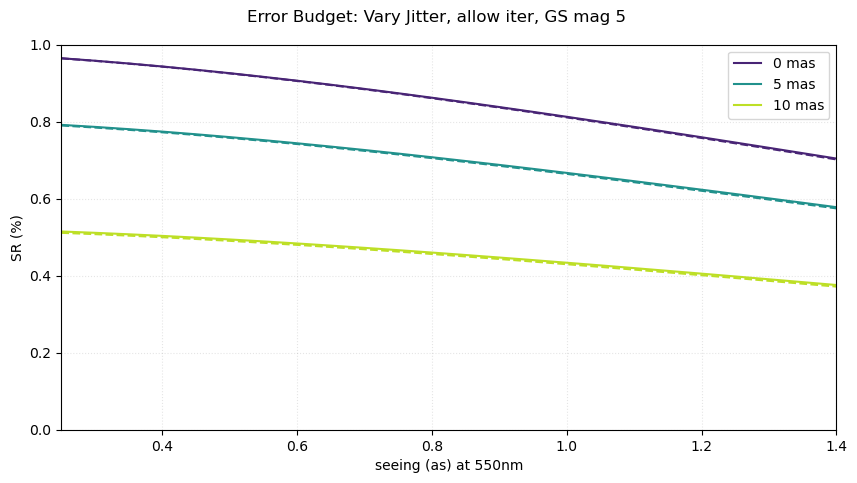

In [70]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5), facecolor='white', sharey=True)
fig.suptitle("Error Budget: Vary Jitter, allow iter, GS mag 5", y = 0.95)
fig.subplots_adjust(wspace=0, hspace = 0)
axs.grid(color='grey', linestyle=':', alpha=0.2)

n = len(jitter_list)
colors = pl.cm.viridis(np.linspace(0.1,.9, n))

for i in range(n):
    axs.plot(DIMM_list, strehl_jitter_list[i], label = f"{jitter_list[i]} mas", color=colors[i])
    axs.plot(DIMM_list, strehl_jitter_list_iter[i], color=colors[i], ls='dashed')
    axs.set_xlabel('seeing (as) at 550nm')

axs.set_ylabel('SR (%)')
axs.set_xlim(0.25, 1.4)
axs.set_ylim(0,1)
axs.legend()

plt.show()

## vary wind

In [81]:
# Params
DIMM_list = np.arange(.25, 1.5, 0.05)
r_o_list = eb.seeing_to_r_o(DIMM_list)
wind_list = [10, 18.7, 30]
# calc Strehl
strehl_wind_list = [[eb.calc_strehl(r_o = r_i, rms_jitter = 5, v_wind = w, Hz=1800) for r_i in r_o_list] for w in wind_list]
strehl_wind_list_iter = [[eb.calc_strehl(r_o = r_i, rms_jitter = 5, v_wind = w, Hz=1800) for r_i in r_o_list] for w in wind_list]

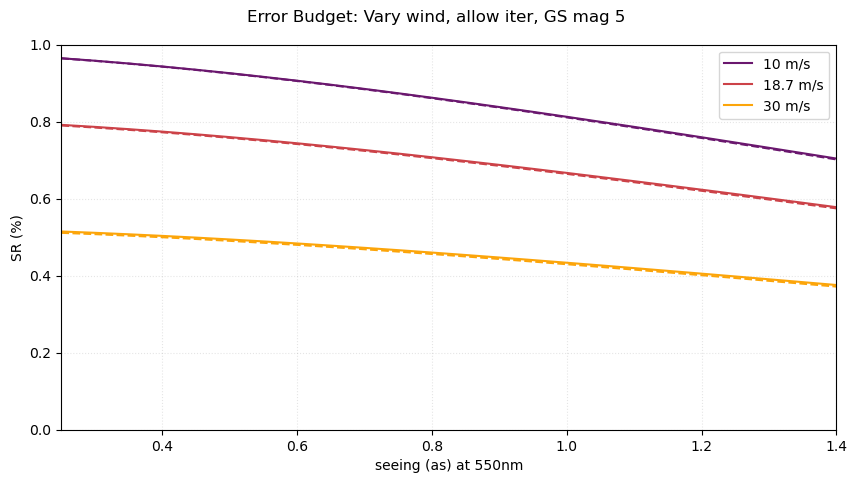

In [82]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5), facecolor='white', sharey=True)
fig.suptitle("Error Budget: Vary wind, allow iter, GS mag 5", y = 0.95)
fig.subplots_adjust(wspace=0, hspace = 0)
axs.grid(color='grey', linestyle=':', alpha=0.2)

n = len(wind_list)
colors = pl.cm.inferno(np.linspace(0.3,.8, n))

for i in range(n):
    axs.plot(DIMM_list, strehl_jitter_list[i], label = f"{wind_list[i]} m/s", color=colors[i])
    axs.plot(DIMM_list, strehl_jitter_list_iter[i], color=colors[i], ls='dashed')
    axs.set_xlabel('seeing (as) at 550nm')

axs.set_ylabel('SR (%)')
axs.set_xlim(0.25, 1.4)
axs.set_ylim(0,1)
axs.legend()

plt.show()

# err budget calc - old

In [2]:
# givens
r_o = 0.16 # make a scale
v_wind = 18.7 # m/s
D_tel = 6.5 # m
n_act_acr = 39 # change this
n_act = n_act_acr**2 
t_int = 0.0005 #s
s_mag = 4
t_s_lag = 0.005 #s
lam_ro = 550 #nm
lam_wave = 810 # nm
ang_zenith = 0 #ang

In [3]:
# caluclations
airmass = 1 / np.cos(ang_zenith * np.pi / 180)
seeing_550 = 0.1/r_o
ro_scaled = r_o * (lam_wave / lam_ro)**(5/3) * airmass**(-3/5)
D_div_ro = D_tel / ro_scaled
frq_GW = 0.43 * v_wind / ro_scaled # f_o
act_acr_ap = 2*np.sqrt(n_act_acr/np.pi)
act_spacing = D_tel / act_acr_ap

In [4]:
# magnitude calc
mag0_flux = 452 # p / cm^2 / s / Ang
area = (D_tel*100)**2 * np.pi / 4 #cm^2
delt_lam = 3570 # ang
throughput = 0.1
photons = mag0_flux * area * delt_lam * throughput
phot_flux = photons*t_int*10**(-s_mag/2.5)

In [16]:
# Error Fitting
def calc_err_fit_rad(act_space, ro_scaled):
    err = 0.28 * (act_space / ro_scaled)**(5/3)
    return err**0.5

def calc_err_fit_nm(act_space, ro_scaled, lam_wave):
    err_rad = calc_err_fit_rad(act_space, ro_scaled)
    return lam_wave*err_rad / (2*np.pi)

# Error temporal
def calc_err_temp_rad(t_s_lag, f_o):
    err = (t_s_lag*f_o)**(5/3)
    return err**0.5

def calc_err_temp_nm(t_s_lag, t_o, lam_wave):
    err_rad = calc_err_temp_rad(t_s_lag, t_o)
    return lam_wave*err_rad / (2*np.pi)

# Error photon noise
def calc_err_phot_rad(n_act, phot_flux):
    # extra beta_p term from pywfs term
    beta_p =2*np.sqrt(2) 
    err = beta_p * n_act / phot_flux
    return err**0.5

def calc_err_phot_nm(n_act, phot_flux, lam_wave):
    err_rad = calc_err_phot_rad(n_act, phot_flux)
    return lam_wave*err_rad / (2*np.pi)

# Error from TT residuals
def calc_strehl_tt(rms_jitter, D_tel, lam_wave):
    #print("RMS Jitter [mas]: ", rms_jitter)
    k = 0.98 # from central obstruction
    coeff  =  8*np.log(2) / k**2
    psf_width_rad = (lam_wave*1e-9 /  D_tel)
    psf_width_mas  = psf_width_rad * 206265 * 1000
    #print("PSF FWHM in [mas]: ", psf_width_mas)
    gauss = rms_jitter / psf_width_mas
    denom = 1 + coeff*(gauss**2)
    strehl_tt = 1/denom
    #print("Strehl tt: ", strehl_tt)
    return strehl_tt


In [10]:
calc_strehl_tt(5, 6.5, 810)

RMS Jitter [mas]:  5
PSF FWHM in [mas]:  25.703792307692307
Strehl tt:  0.8206955807953422


0.8206955807953422

In [12]:
def ro_to_seeing_dumb(r_o):
    return 0.1/r_o

def ro_to_seeing(r_o, lamda=550):
    seeing_rad = 0.98*lamda*1e-9/r_o
    factor_as = 60*60*180/(np.pi) 
    factor = 206265
    return seeing_rad*factor

def seeing_to_r_o(seeing, lam_seeing=550):
    as_factor = 1/206265
    r_o = (0.98*lam_seeing*1e-9) / (as_factor*seeing)
    return r_o

In [22]:
def calc_strehl(s_mag=5, r_o=0.16, n_act_acr=39, t_int = 0.0005, err_NCPA_nm=23, rms_jitter = 0, v_wind=15):
    # Inputs that are mostly constant:
    t_s_lag = 0.005 #s usually 10 time control loop speed, control bandwidth
    D_tel=6.5
    n_act = n_act_acr**2
    lam_ro = 550 #nm
    lam_wave = 810 # nm
    ang_zenith = 0 #ang
    # Caluclations
    airmass = 1 / np.cos(ang_zenith * np.pi / 180)
    seeing_550 = 0.1/r_o
    ro_scaled = r_o * (lam_wave / lam_ro)**(5/3) * airmass**(-3/5)
    D_div_ro = D_tel / ro_scaled
    frq_GW = 0.43 * v_wind / ro_scaled
    act_acr_ap = 2*np.sqrt(n_act/np.pi)
    act_spacing = D_tel / act_acr_ap
    # magnitude calc
    mag0_flux = 452 # p / cm^2 / s / Ang
    area = (D_tel*100)**2 * np.pi / 4 #cm^2
    delt_lam = 3570 # ang
    throughput = 0.1
    photons = mag0_flux * area * delt_lam * throughput
    phot_flux = photons*t_int*10**(-s_mag/2.5)
    # err in rad for strehl
    err_fit_rad = calc_err_fit_rad(act_spacing, ro_scaled)
    err_temp_rad = calc_err_temp_rad(t_s_lag, frq_GW)
    err_phot_rad = calc_err_phot_rad(n_act, phot_flux)
    # calc Strehl from rad err
    err_tot_sq = err_fit_rad**2 + err_temp_rad**2 + err_phot_rad**2
    strehl = np.exp(-err_tot_sq)
    strehl_tt = calc_strehl_tt(rms_jitter, D_tel, lam_wave)
    return strehl*strehl_tt


#### Checking with dataframe/

In [14]:
def calc_strehl_df(s_mag=5, r_o=0.16, n_act_acr=39, t_int = 0.0005, rms_jitter = 5):
    # Inputs that are mostly constant:
    v_wind = 15
    t_s_lag = 0.005 #s usually 10 time control loop speed, control bandwidth
    D_tel = 6.5
    n_act = n_act_acr**2
    lam_ro = 550 #nm
    lam_wave = 810 # nm
    ang_zenith = 0 #ang
    # Caluclations
    airmass = 1 / np.cos(ang_zenith * np.pi / 180)
    seeing_550 = 0.1/r_o
    ro_scaled = r_o * (lam_wave / lam_ro)**(5/3) * airmass**(-3/5)
    D_div_ro = D_tel / ro_scaled
    frq_GW = 0.43 * v_wind / ro_scaled
    act_acr_ap = 2*np.sqrt(n_act/np.pi)
    act_spacing = D_tel / act_acr_ap
    # magnitude calc
    mag0_flux = 452 # p / cm^2 / s / Ang
    area = (D_tel*100)**2 * np.pi / 4 #cm^2
    delt_lam = 3570 # ang
    throughput = 0.1
    photons = mag0_flux * area * delt_lam * throughput
    phot_flux = photons*t_int*10**(-s_mag/2.5)
    # err in rad for strehl
    err_fit_rad = calc_err_fit_rad(act_spacing, ro_scaled)
    err_fit_nm = calc_err_fit_nm(act_spacing, ro_scaled, lam_wave)
    err_temp_rad = calc_err_temp_rad(t_s_lag, frq_GW)
    err_temp_nm = calc_err_temp_nm(t_s_lag, frq_GW, lam_wave)
    err_phot_rad = calc_err_phot_rad(n_act, phot_flux)
    err_phot_nm = calc_err_phot_nm(n_act, phot_flux, lam_wave)
    # calc Strehl from rad err
    err_tot_sq = err_fit_rad**2 + err_temp_rad**2 + err_phot_rad**2 
    strehl = np.exp(-err_tot_sq)
    strehl_tt = calc_strehl_tt(rms_jitter, D_tel, lam_wave)
    return [strehl, strehl_tt, strehl*strehl_tt, r_o, ro_scaled, err_fit_rad, err_temp_rad, err_phot_rad, err_fit_nm, err_temp_nm, err_phot_nm, s_mag, phot_flux,  n_act, n_act_acr, act_acr_ap, act_spacing, t_int, t_s_lag, v_wind, frq_GW, lam_ro, lam_wave]

In [44]:
columns = ["SR_er", "SR_tt", "SR", "ro", "ro_scaled", "err_fit", "err_temp", "err_phot", "err_fit_nm", "err_temp_nm", "err_phot_nm", "mag", "phot_flux", "n_act", "n_act_across", "act_across_ap", "act_spacing", "t_int", "t_s_lag", "v_wind", "GW_frq", "wavelegth_ro", "wavelength_wfs"]

DIMM_list = np.arange(.25, 1.5, 0.05)
r_o_list = seeing_to_r_o(DIMM_list)
strehl_big_list = [calc_strehl_df(r_o = r_i) for r_i in r_o_list]


In [4]:
strehl_big_df = pd.DataFrame(strehl_big_list, columns = columns)

NameError: name 'strehl_big_list' is not defined

In [23]:
strehl_big_df.to_csv("err_budget_example.csv", sep='\t')

In [39]:
strehl_big_df

,SR_er,SR_tt,SR,ro,ro_scaled,err_fit,err_temp,err_phot,err_fit_nm,err_temp_nm,...,n_act,n_act_across,act_across_ap,act_spacing,t_int,t_s_lag,v_wind,GW_frq,wavelegth_ro,wavelength_wfs
0,0.965037,0.533642,0.514984,0.444707,0.847770,0.123360,0.065596,0.126762,15.903050,8.456320,...,1521,39,44.006788,0.147704,0.0005,0.005,15,7.608193,550,810
1,0.958370,0.533642,0.511427,0.370589,0.706475,0.143602,0.076359,0.126762,18.512488,9.843869,...,1521,39,44.006788,0.147704,0.0005,0.005,15,9.129832,550,810
2,0.950973,0.533642,0.507479,0.317648,0.605550,0.163286,0.086826,0.126762,21.050082,11.193214,...,1521,39,44.006788,0.147704,0.0005,0.005,15,10.651471,550,810
3,0.942900,0.533642,0.503171,0.277942,0.529856,0.182505,0.097046,0.126762,23.527751,12.510694,...,1521,39,44.006788,0.147704,0.0005,0.005,15,12.173109,550,810
4,0.934203,0.533642,0.498530,0.247060,0.470983,0.201327,0.107054,0.126762,25.954192,13.800935,...,1521,39,44.006788,0.147704,0.0005,0.005,15,13.694748,550,810
5,0.924925,0.533642,0.493579,0.222354,0.423885,0.219803,0.116878,0.126762,28.336014,15.067450,...,1521,39,44.006788,0.147704,0.0005,0.005,15,15.216386,550,810
6,0.915109,0.533642,0.488341,0.202140,0.385350,0.237973,0.126540,0.126762,30.678397,16.312994,...,1521,39,44.006788,0.147704,0.0005,0.005,15,16.738025,550,810
7,0.904793,0.533642,0.482836,0.185295,0.353238,0.255869,0.136056,0.126762,32.985504,17.539780,...,1521,39,44.006788,0.147704,0.0005,0.005,15,18.259664,550,810
8,0.894014,0.533642,0.477084,0.171041,0.326065,0.273518,0.145441,0.126762,35.260750,18.749624,...,1521,39,44.006788,0.147704,0.0005,0.005,15,19.781302,550,810
9,0.882806,0.533642,0.471102,0.158824,0.302775,0.290942,0.154706,0.126762,37.506982,19.944040,...,1521,39,44.006788,0.147704,0.0005,0.005,15,21.302941,550,810


In [74]:
print(ro_to_seeing_dumb(ro_list))

[2.         1.66666667 1.42857143 1.25       1.11111111 1.
 0.90909091 0.83333333 0.76923077 0.71428571 0.66666667 0.625
 0.58823529 0.55555556 0.52631579 0.5        0.47619048 0.45454545
 0.43478261 0.41666667 0.4        0.38461538 0.37037037 0.35714286
 0.34482759 0.33333333 0.32258065 0.3125     0.3030303  0.29411765
 0.28571429 0.27777778 0.27027027 0.26315789 0.25641026]


In [79]:
print(ro_to_seeing(ro_list))36

[2.2235367  1.85294725 1.5882405  1.38971044 1.23529817 1.11176835
 1.0106985  0.92647362 0.85520642 0.79412025 0.7411789  0.69485522
 0.65398138 0.61764908 0.58514124 0.55588417 0.5294135  0.50534925
 0.48337754 0.46323681 0.44470734 0.42760321 0.41176606 0.39706012
 0.3833684  0.37058945 0.35863495 0.34742761 0.3368995  0.32699069
 0.3176481  0.30882454 0.30047793 0.29257062 0.28506881]


## Adding Jitter

In [17]:
DIMM_list = np.arange(.25, 1.5, 0.05)
r_o_list = seeing_to_r_o(DIMM_list)
jitter_list = [0, 5, 10]
strehl_jitter_list = [[calc_strehl(r_o = r_i, rms_jitter = a) for r_i in r_o_list] for a in jitter_list]

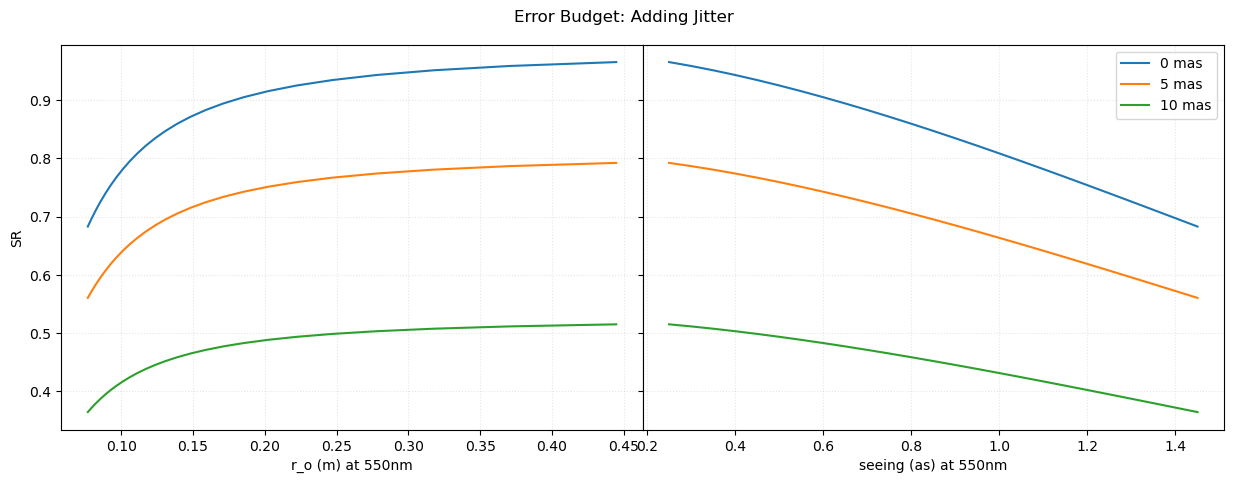

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5), facecolor='white', sharey=True)
fig.suptitle("Error Budget: Adding Jitter", y = 0.95)
fig.subplots_adjust(wspace=036, hspace = 0)

axs[0].grid(color='grey', linestyle=':', alpha=0.2)
axs[1].grid(color='grey', linestyle=':', alpha=0.2)
for i in range(len(jitter_list)):
    axs[0].plot(r_o_list, strehl_jitter_list[i], label = f"{jitter_list[i]} mas")
    axs[0].set_xlabel('r_o (m) at 550nm')

for i in range(len(jitter_list)):
    axs[1].plot(DIMM_list, strehl_jitter_list[i], label = f"{jitter_list[i]} mas")
    axs[1].set_xlabel('seeing (as) at 550nm')

axs[0].set_ylabel('SR at 810nm')
axs[1].legend()

plt.show()

## vary wind

In [23]:
DIMM_list = np.arange(.25, 1.5, 0.05)
r_o_list = seeing_to_r_o(DIMM_list)
wind_list = [0, 5, 10,15, 20, 25, 30]
strehl_wind_list = [[calc_strehl(r_o = r_i, rms_jitter = 5, v_wind = w) for r_i in r_o_list] for w in wind_list]

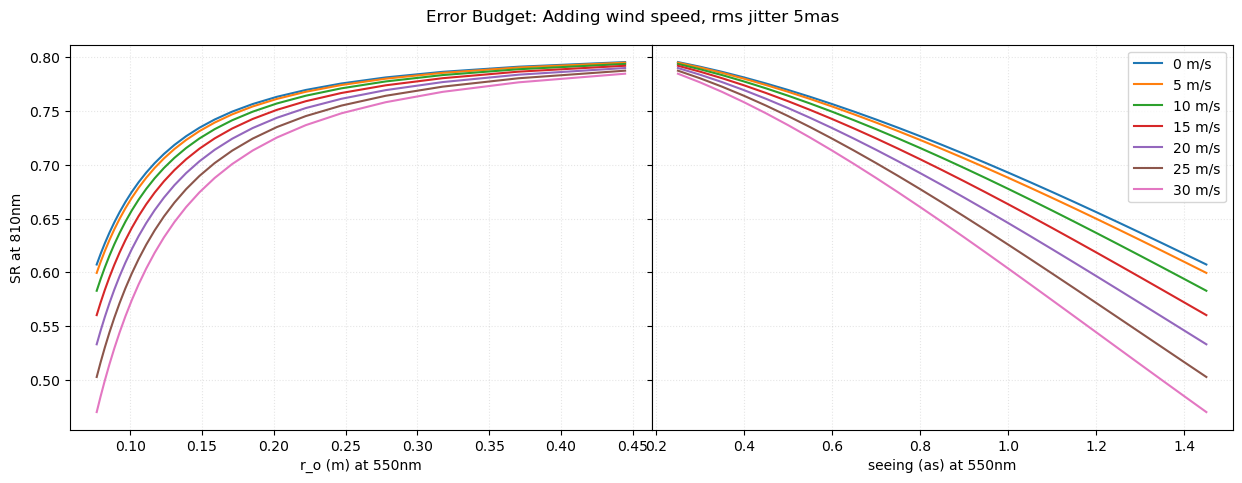

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5), facecolor='white', sharey=True)
fig.suptitle("Error Budget: Adding wind speed, rms jitter 5mas", y = 0.95)
fig.subplots_adjust(wspace=0, hspace = 0)

axs[0].grid(color='grey', linestyle=':', alpha=0.2)
axs[1].grid(color='grey', linestyle=':', alpha=0.2)
for i in range(len(wind_list)):
    axs[0].plot(r_o_list, strehl_wind_list[i], label = f"{wind_list[i]} m/s")
    axs[0].set_xlabel('r_o (m) at 550nm')

for i in range(len(wind_list)):
    axs[1].plot(DIMM_list, strehl_wind_list[i], label = f"{wind_list[i]} m/s")
    axs[1].set_xlabel('seeing (as) at 550nm')

axs[0].set_ylabel('SR at 810nm')
axs[1].legend()

plt.show()

## First plot: Vary Control modes

seeing vs. Strehl, picking an average guide star of 5th mag

with or without added WFE resitudals

In [48]:
DIMM_list = np.arange(.25, 1.5, 0.05)
r_o_list = seeing_to_r_o(DIMM_list)
modal_control = [39, 32, 29, 27, 25, 21]
strehl_list = [[calc_strehl(r_o = r_i, n_act_acr = a) for r_i in r_o_list] for a in modal_control]
print(r_o_list)
print(strehl_list[0])

[0.44470734 0.37058945 0.3176481  0.27794209 0.24705963 0.22235367
 0.2021397  0.18529473 0.17104128 0.15882405 0.14823578 0.13897104
 0.13079628 0.12352982 0.11702825 0.11117684 0.1058827  0.10106985
 0.09667551 0.09264736 0.08894147 0.08552064 0.08235321 0.07941203
 0.07667368]
[0.5149843461727154, 0.5114270264163311, 0.5074793616895836, 0.5031714941955632, 0.4985300477115947, 0.49357910164615787, 0.4883408119532563, 0.4828358256930705, 0.4770835677390906, 0.47110244455642447, 0.4649099921867304, 0.4585229855685274, 0.45195752040907344, 0.44522907518361454, 0.43835255851641514, 0.4313423456721959, 0.4242123068569107, 0.4169758293154993, 0.4096458347126284, 0.4022347929220236, 0.3947547330866856, 0.3872172526169481, 0.3796335246464144, 0.372014304353887, 0.3643699344731427]


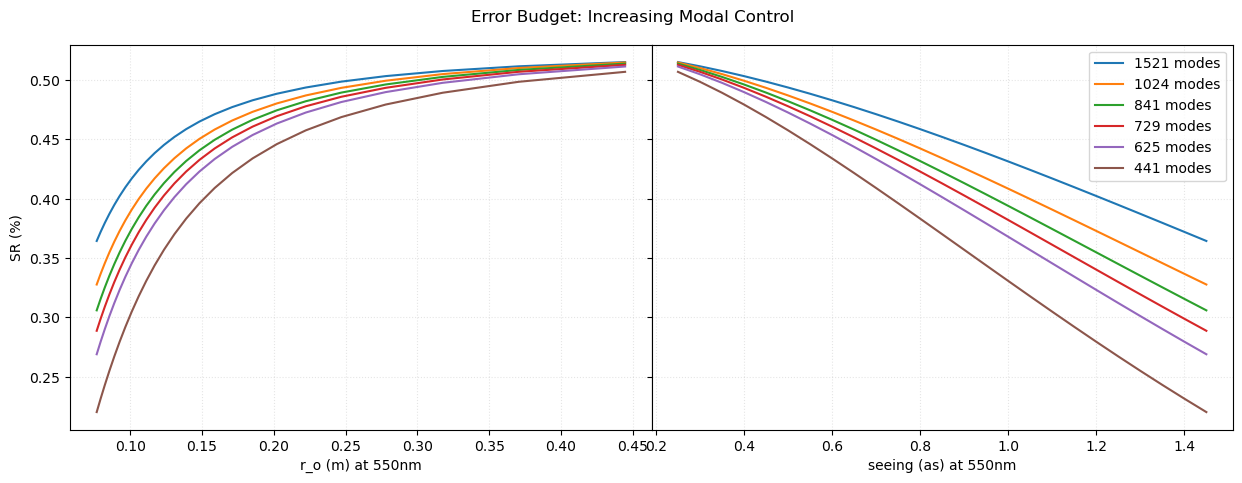

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5), facecolor='white', sharey=True)
fig.suptitle("Error Budget: Increasing Modal Control", y = 0.95)
fig.subplots_adjust(wspace=0, hspace = 0)

axs[0].grid(color='grey', linestyle=':', alpha=0.2)
axs[1].grid(color='grey', linestyle=':', alpha=0.2)
for i in range(len(modal_control)):
    axs[0].plot(r_o_list, strehl_list[i], label = f"{modal_control[i]**2} modes")
    axs[0].set_xlabel('r_o (m) at 550nm')

for i in range(len(modal_control)):
    axs[1].plot(DIMM_list, strehl_list[i], label = f"{modal_control[i]**2} modes")
    axs[1].set_xlabel('seeing (as) at 550nm')

axs[0].set_ylabel('SR (%)')
axs[1].legend()

plt.show()

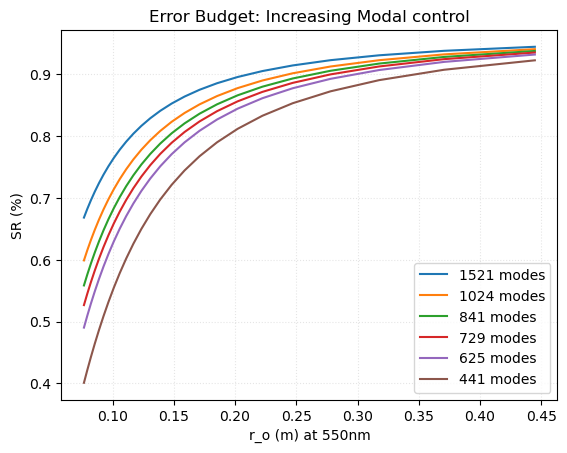

In [33]:
plt.title("Error Budget: Increasing Modal control")
plt.xlabel('r_o (m) at 550nm')
plt.ylabel('SR (%)')
plt.grid(color='grey', linestyle=':', alpha=0.2)
for i in range(len(modal_control)):
    plt.plot(r_o_list, strehl_list[i], label = f"{modal_control[i]**2} modes")
plt.legend()

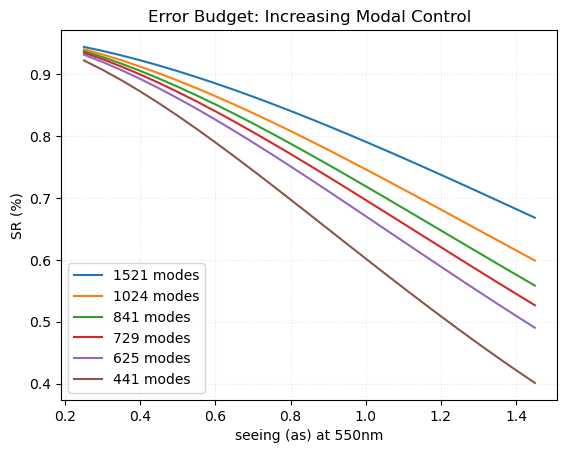

In [32]:
# same plot but with seeing as in DIMM (as)
plt.title("Error Budget: Increasing Modal Control")
plt.xlabel('seeing (as) at 550nm')
plt.ylabel('SR (%)')
plt.grid(color='grey', linestyle=':', alpha=0.2)
for i in range(len(modal_control)):
    plt.plot(DIMM_list, strehl_list[i], label = f"{modal_control[i]**2} modes")
plt.legend()
plt.show()


## Second Plot: Vary guide star magnitude

In [23]:
DIMM_list = np.arange(.25, 1.5, 0.05)
r_o_list = seeing_to_r_o(DIMM_list) # in meters
mags_list = np.arange(2, 11, 1)
strehl_list = [[calc_strehl(r_o = r_i, s_mag = m) for r_i in r_o_list] for m in mags_list]

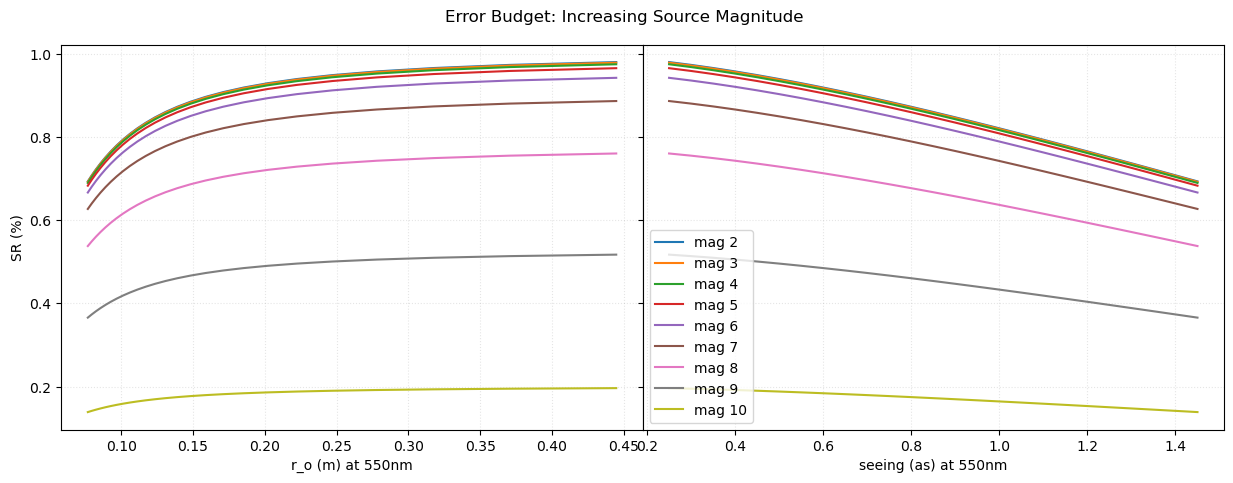

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5), facecolor='white', sharey=True)
fig.suptitle("Error Budget: Increasing Source Magnitude", y = 0.95)
fig.subplots_adjust(wspace=0, hspace = 0)

axs[0].grid(color='grey', linestyle=':', alpha=0.2)
axs[1].grid(color='grey', linestyle=':', alpha=0.2)
for i in range(len(mags_list)):
    axs[0].plot(r_o_list, strehl_list[i], label = f"mag {mags_list[i]}")
    axs[0].set_xlabel('r_o (m) at 550nm')

for i in range(len(mags_list)):
    axs[1].plot(DIMM_list, strehl_list[i], label = f"mag {mags_list[i]}")
    axs[1].set_xlabel('seeing (as) at 550nm')

axs[0].set_ylabel('SR (%)')
axs[1].legend()

plt.show()

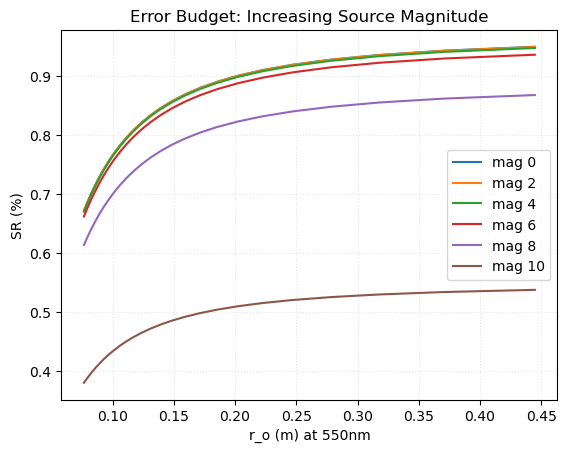

In [36]:
plt.title("Error Budget: Increasing Source Magnitude")
plt.xlabel('r_o (m) at 550nm')
plt.ylabel('SR (%)')
plt.grid(color='grey', linestyle=':', alpha=0.2)
for i in range(len(mags_list)):
    plt.plot(r_o_list, strehl_list[i], label = f"mag {mags_list[i]}")
plt.legend()

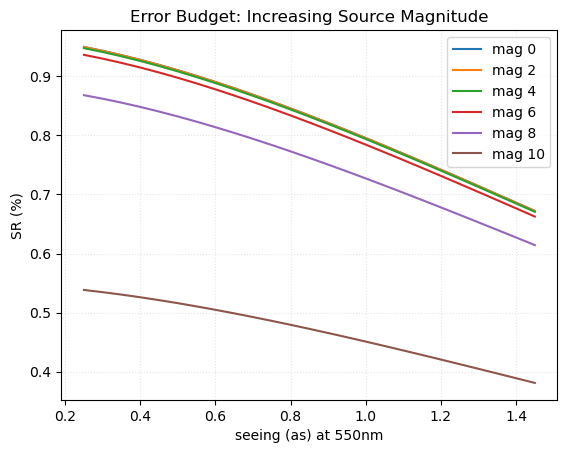

In [38]:
# same plot but with seeing as in DIMM (as)
plt.title("Error Budget: Increasing Source Magnitude")
plt.xlabel('seeing (as) at 550nm')
plt.ylabel('SR (%)')
plt.grid(color='grey', linestyle=':', alpha=0.2)
for i in range(len(modal_control)):
    plt.plot(DIMM_list, strehl_list[i], label = f"mag {mags_list[i]}")
plt.legend()

### Using iterative approach 

In [1]:
import sim.err_budget as eb
from importlib import reload

In [18]:
reload(eb)

<module 'sim.err_budget' from '/home/eden/code/sparkles/sim/err_budget.py'>

In [21]:
eb.calc_strehl_iter(r_o=0.05, s_mag=8)

iter 1: Strehl 0.37187569361893247, diff 0.6281243063810675
iter 2: Strehl 0.31329563697935103, diff 0.058580056639581435
iter 3: Strehl 0.30121820730834353, diff 0.0120774296710075
iter 4: Strehl 0.2983698901945796, diff 0.002848317113763932
iter 5: Strehl 0.29767717924880316, diff 0.0006927109457764424


(0.29767717924880316, 5)